In [62]:
import os
import multiprocessing

from json import loads

# from time import sleep
import pandas as pd
import kblab 
import math
from pandas.core.frame import DataFrame
from tqdm import tqdm
from urllib3.util import Retry
from urllib3 import PoolManager, make_headers
from kblab import Archive
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
kblab.VERIFY_CA=False

In [63]:
dfYearCountList = [0,1,2,3,4,5,6,7,8,9]
index = 0
for i in range(1920, 2020, 10):
  tmp = pd.read_feather(f"data/dfYearCount_{i}s.feather")
  dfYearCountList[index] = tmp
  index +=1

In [64]:
for i in range(0,len(dfYearCountList)):
  print(dfYearCountList[i].sum())


word count    625205142
dtype: int64
word count    718250594
dtype: int64
word count    693277817
dtype: int64
word count    693952090
dtype: int64
word count    856850458
dtype: int64
word count    818895971
dtype: int64
word count    1091583071
dtype: int64
word count    1094531857
dtype: int64
word count    1067784784
dtype: int64
word count    1130146619
dtype: int64


In [65]:
dfFreqList = [0,1,2,3,4,5,6,7,8,9]
index = 0
for i in range(1920, 2020, 10):
  tmp = pd.read_feather(f"data/dfFreq_{i}s.feather")
  dfFreqList[index] = tmp.sort_values(by=i, ascending=False)
  index +=1


In [66]:
dfFreqList[0].index

Index(['and', 'sångare', 'seglare', 'falk', 'svala', 'gås', 'uggla', 'pelikan',
       'tärna', 'stork',
       ...
       'gluttsnäppa', 'nötkråka', 'svartsnäppa', 'sommargylling', 'törnskata',
       'kråkfågel', 'lavskrika', 'nötskrika', 'willet', 'tofslärka'],
      dtype='object', length=341)

In [67]:
freq = dfFreqList[0].join(dfFreqList[1], how="outer").join(dfFreqList[2], how="outer").join(dfFreqList[3], how="outer").join(dfFreqList[4], how="outer").join(dfFreqList[5], how="outer").join(dfFreqList[6], how="outer").join(dfFreqList[7], how="outer").join(dfFreqList[8], how="outer").join(dfFreqList[9], how="outer")

In [68]:
pd.set_option('display.max_rows', None)


In [69]:
freq = freq.drop("sångare")

<Axes: >

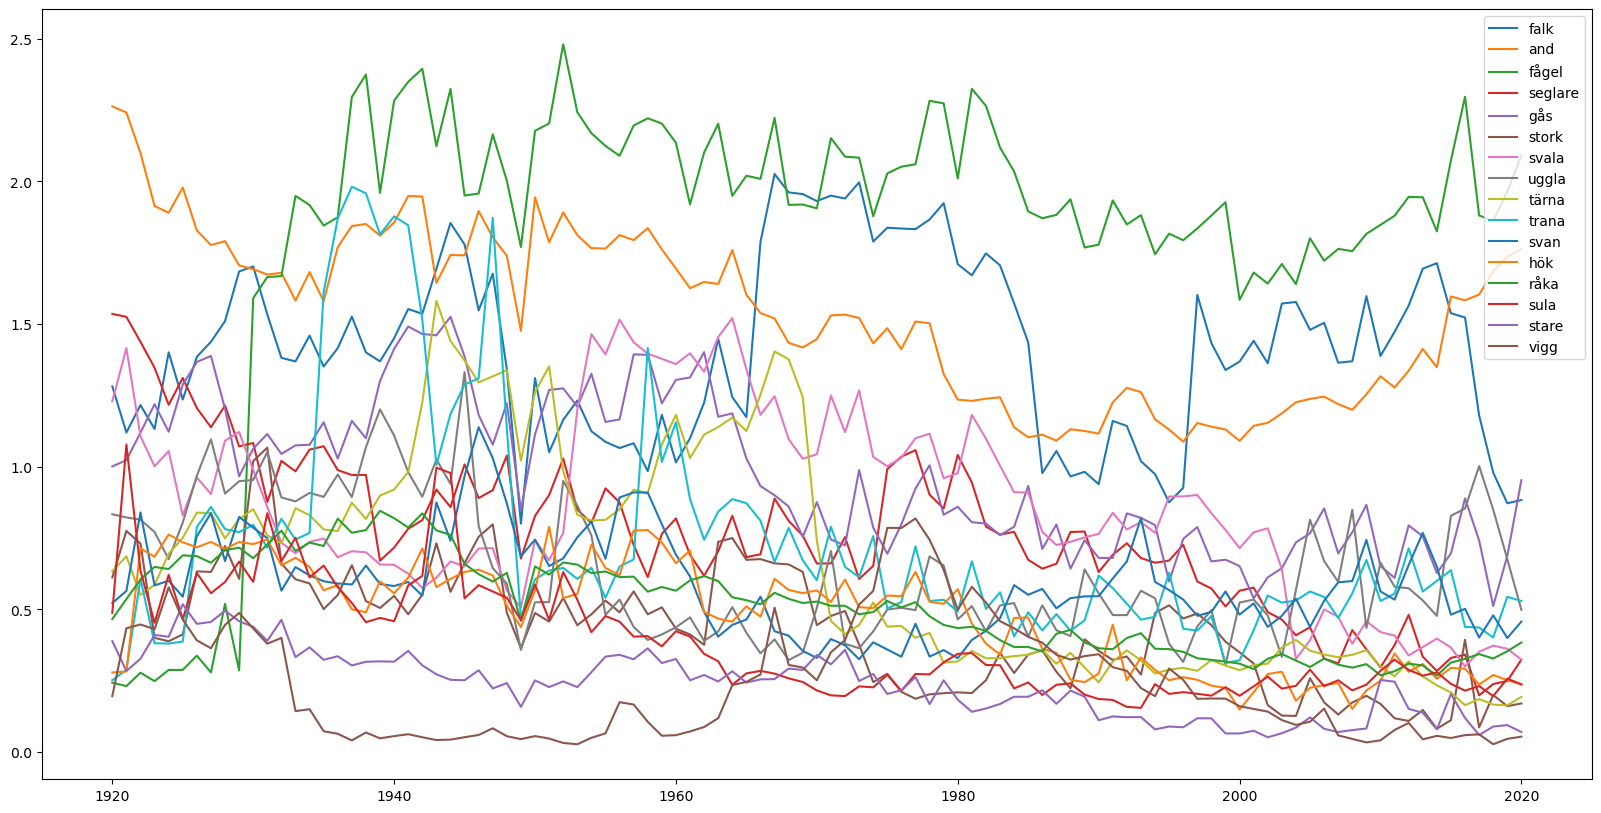

In [70]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
freq[freq[1930] > 0.4] .sort_values(by=1930, ascending=False).T.plot(ax = ax)


In [71]:
dfSenList = [1920,1930,1980, 2010]
index = 0
for i in dfSenList:
  dfSenList[index] = pd.read_feather(f"data/df_sen_{dfSenList[index]}s_fågel.feather")
  index +=1

In [72]:
n = 2
tmp = "hej på dig där, jag heter edvin och pluggar datateknik"
lhs, bird, rhs  = tmp.partition("edvin")
lhs.split()[-n:]

['jag', 'heter']

In [73]:
lhs, bird, rhs  = tmp.partition("edvin")
lhs[-11:] + bird + rhs[:11]

' jag heter edvin och plugga'

<Axes: >

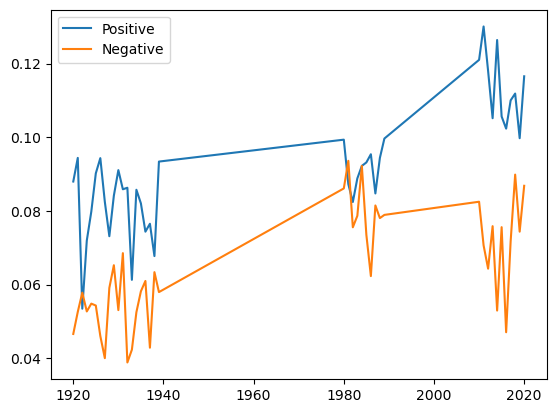

In [74]:
lmao2 = dfSenList[0].join(dfSenList[1]).join(dfSenList[2]).join(dfSenList[3])
lmao2 = lmao2.div(lmao2.sum())
lmao2.drop("Neutral").T.plot()

In [75]:
dfCountList = [0,1,2,3,4,5,6,7,8,9]
index = 0
for i in range(1920, 2020, 10):
  tmp = pd.read_feather(f"data/dfFreq_{i}s.feather")
  dfCountList[index] = tmp
  index +=1

In [76]:
dfCount = dfCountList[0].join(dfCountList[1], how="outer").join(dfCountList[2], how="outer").join(dfCountList[3], how="outer").join(dfCountList[4], how="outer").join(dfCountList[5], how="outer").join(dfCountList[6], how="outer").join(dfCountList[7], how="outer").join(dfCountList[8], how="outer").join(dfCountList[9], how="outer")
dfCountSum = dfCount.sum()

birdTypes = pd.read_csv("birdType.csv")
birdTypes["name"]


0               and
1              höna
2        nattskärra
3           seglare
4           kolibri
5             trapp
6               gök
7          flyghöns
8              duva
9             trana
10          dopping
11         flamingo
12           vadare
13              lom
14     N/stormfågel
15            stork
16             sula
17          pelikan
18              hök
19            uggla
20         härfågel
21    näshornsfågel
22      hackspettar
23             falk
24     papegojfågel
25          tätting
Name: name, dtype: object

In [77]:
dfCount.loc["aftonfalk"].sum()

0.14854760397652653

In [78]:
dfCountTypes = dfCount.filter(birdTypes["type"], axis=0)
dfCountFamily = dfCount.filter(birdTypes["name"], axis=0)
dfFilteredTypes = pd.concat([dfCountTypes, dfCountFamily])
dfFilteredTypes.index

Index(['andfågel', 'hönsfågel', 'nattskärrfågel', 'seglarfågel',
       'kolibrifågel', 'trappfågel', 'gökfågel', 'duvfågel', 'tranfågel',
       'flamingofågel', 'vadarfågel', 'lomfågel', 'stormfågel', 'storkfågel',
       'sulfågel', 'pelikanfågel', 'hökfågel', 'ugglefågel', 'härfågel',
       'näshornsfågel', 'falkfågel', 'papegojfågel', 'tätting', 'and',
       'nattskärra', 'seglare', 'trapp', 'gök', 'flyghöns', 'duva', 'trana',
       'dopping', 'flamingo', 'vadare', 'lom', 'stork', 'sula', 'pelikan',
       'hök', 'uggla', 'härfågel', 'näshornsfågel', 'hackspettar', 'falk',
       'papegojfågel', 'tätting'],
      dtype='object')

In [79]:
dfTypesSum = dfFilteredTypes.sum()
dfTypesSum = dfTypesSum.groupby(dfTypesSum.index // 10).sum()


In [80]:
dfFågel = dfCount.loc["fågel"]
dfFågel = dfFågel.groupby(dfFågel.index // 10).sum()
dfFågel

192     2.999756
193    19.141482
194    21.320269
195    22.107108
196    20.396771
197    20.801881
198    20.108379
199    18.441184
200    17.117089
201    19.520407
202     2.091206
Name: fågel, dtype: float64

In [113]:
lmao2 = dfCount.drop(dfFilteredTypes.index)
lmao3 = lmao2.drop("fågel")
dfSpecificSum = lmao3.sum()
dfSpecificSum = dfSpecificSum.groupby(dfSpecificSum.index // 10).sum()

In [ ]:
dfSpecific = lmao3
dfSpecific = dfSpecific.drop("sångare")
dfSpecific = dfSpecific.T
print(dfSpecific)
dfSpecific = dfSpecific.groupby(dfSpecific.index // 10).sum()
dfSpecific = dfSpecific.drop([202])
dfSpecific = dfSpecific.rename(index = {192:1920, 193:1930, 194:1940, 195:1950, 196:1960, 197:1970, 198:1980, 199:1990, 200:2000, 201:2010})

In [ ]:
['gås', 'svala', 'tärna', 'svan', 'råka', 'vigg', 'stare', 'tjäder',
       'mås', 'lira']

In [195]:
bestBirds = []

In [196]:
for i in range(1920, 2020, 10):
  bestBirds.append(dfSpecific.T.sort_values(by=i, ascending=False).head(10)[i].to_frame())

In [197]:
bestBirds

[             1920
 gås     11.699009
 svala   10.718497
 tärna    7.144691
 svan     6.743429
 råka     6.361848
 vigg     4.238519
 stare    4.192275
 tjäder   4.169095
 mås      3.640746
 lira     3.344603,
              1930
 gås     11.121402
 tärna    8.172162
 råka     7.555388
 svala    7.508988
 svan     6.388862
 korp     5.301997
 orre     4.015420
 stare    3.589214
 tjäder   3.504559
 häger    2.885686,
              1940
 gås     13.072374
 tärna   12.493344
 svan     8.035849
 råka     6.950777
 korp     6.356348
 svala    6.288354
 häger    4.695913
 orre     4.639021
 mås      4.375524
 tjäder   3.564607,
              1950
 gås     12.525913
 svala   11.967480
 tärna    9.809945
 svan     7.823085
 råka     6.222946
 häger    3.968942
 mås      3.836306
 kaja     3.565349
 korp     3.262254
 tjäder   3.001699,
                1960
 svala     12.961593
 tärna     12.038406
 gås       10.857688
 råka       5.594511
 mås        5.041388
 svan       4.843326
 häger      3

In [198]:
dfBestBirds = bestBirds[0].join(bestBirds[1], how="outer").join(bestBirds[2], how="outer").join(bestBirds[3], how="outer").join(bestBirds[4], how="outer").join(bestBirds[5], how="outer").join(bestBirds[6], how="outer").join(bestBirds[7], how="outer").join(bestBirds[8], how="outer").join(bestBirds[9], how="outer")

In [82]:
sums = pd.concat([dfFågel,dfTypesSum,dfSpecificSum], axis=1, names=['Series name', 'Row ID'])
sums.columns = ["Bird", "Types", "Specific"]
sums

,Bird,Types,Specific
192,2.999756,92.942185,143.558512
193,19.141482,99.211109,145.747548
194,21.320269,103.247364,162.835293
195,22.107108,89.582072,164.683124
196,20.396771,91.925295,172.902676
197,20.801881,81.378755,172.766543
198,20.108379,68.357964,162.363436
199,18.441184,63.893342,135.248420
200,17.117089,64.473616,118.175567
201,19.520407,64.137829,117.180343


In [83]:
sums = sums.rename(index = {192:1920, 193:1930, 194:1940, 195:1950, 196:1960, 197:1970, 198:1980, 199:1990, 200:2000, 201:2010})

In [84]:
sums= sums[:-1]

In [85]:
rowSums = sums.sum(axis=1)
sums["Bird"] = sums["Bird"] / rowSums
sums["Types"] = sums["Types"] / rowSums
sums["Specific"] = sums["Specific"] / rowSums

In [86]:
sums

,Bird,Types,Specific
1920,0.012525,0.388067,0.599408
1930,0.072478,0.375657,0.551865
1940,0.074183,0.359243,0.566575
1950,0.079990,0.324135,0.595874
1960,0.071511,0.322291,0.606198
1970,0.075658,0.295980,0.628363
1980,0.080167,0.272527,0.647305
1990,0.084755,0.293651,0.621595
2000,0.085686,0.322745,0.591569
2010,0.097195,0.319350,0.583455


<Axes: >

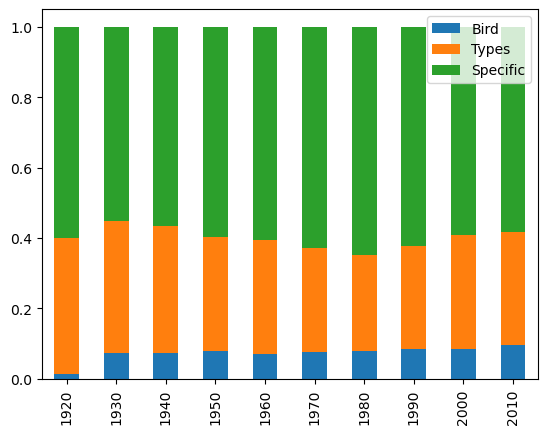

In [87]:

sums.plot(kind="bar", stacked=True)

In [199]:
dfBestBirds

,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
albatross,NaN,NaN,NaN,NaN,NaN,3.664129,7.607756,NaN,NaN,NaN
gås,11.699009,11.121402,13.072374,12.525913,10.857688,8.374472,7.843721,7.290034,7.136258,6.966771
häger,NaN,2.885686,4.695913,3.968942,3.646034,3.377876,3.668534,3.310599,NaN,2.351315
kaja,NaN,NaN,NaN,3.565349,NaN,NaN,NaN,NaN,NaN,NaN
kardinal,NaN,NaN,NaN,NaN,3.002974,NaN,NaN,NaN,NaN,NaN
knipa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.916044,3.652748
korp,NaN,5.301997,6.356348,3.262254,2.975498,NaN,4.261056,2.921617,NaN,3.086978
lira,3.344603,NaN,NaN,NaN,NaN,3.776791,NaN,3.863519,5.404240,4.683428
mes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.723121,NaN
mås,3.640746,NaN,4.375524,3.836306,5.041388,4.473594,3.868727,4.240840,3.914688,2.517110


In [225]:
dfBestBirds[1920].sort_values()

lira          3.344603
mås           3.640746
tjäder        4.169095
stare         4.192275
vigg          4.238519
råka          6.361848
svan          6.743429
tärna         7.144691
svala        10.718497
gås          11.699009
albatross          NaN
häger              NaN
kaja               NaN
kardinal           NaN
knipa              NaN
korp               NaN
mes                NaN
orre               NaN
svärta             NaN
örnar              NaN
Name: 1920, dtype: float64

<Axes: >

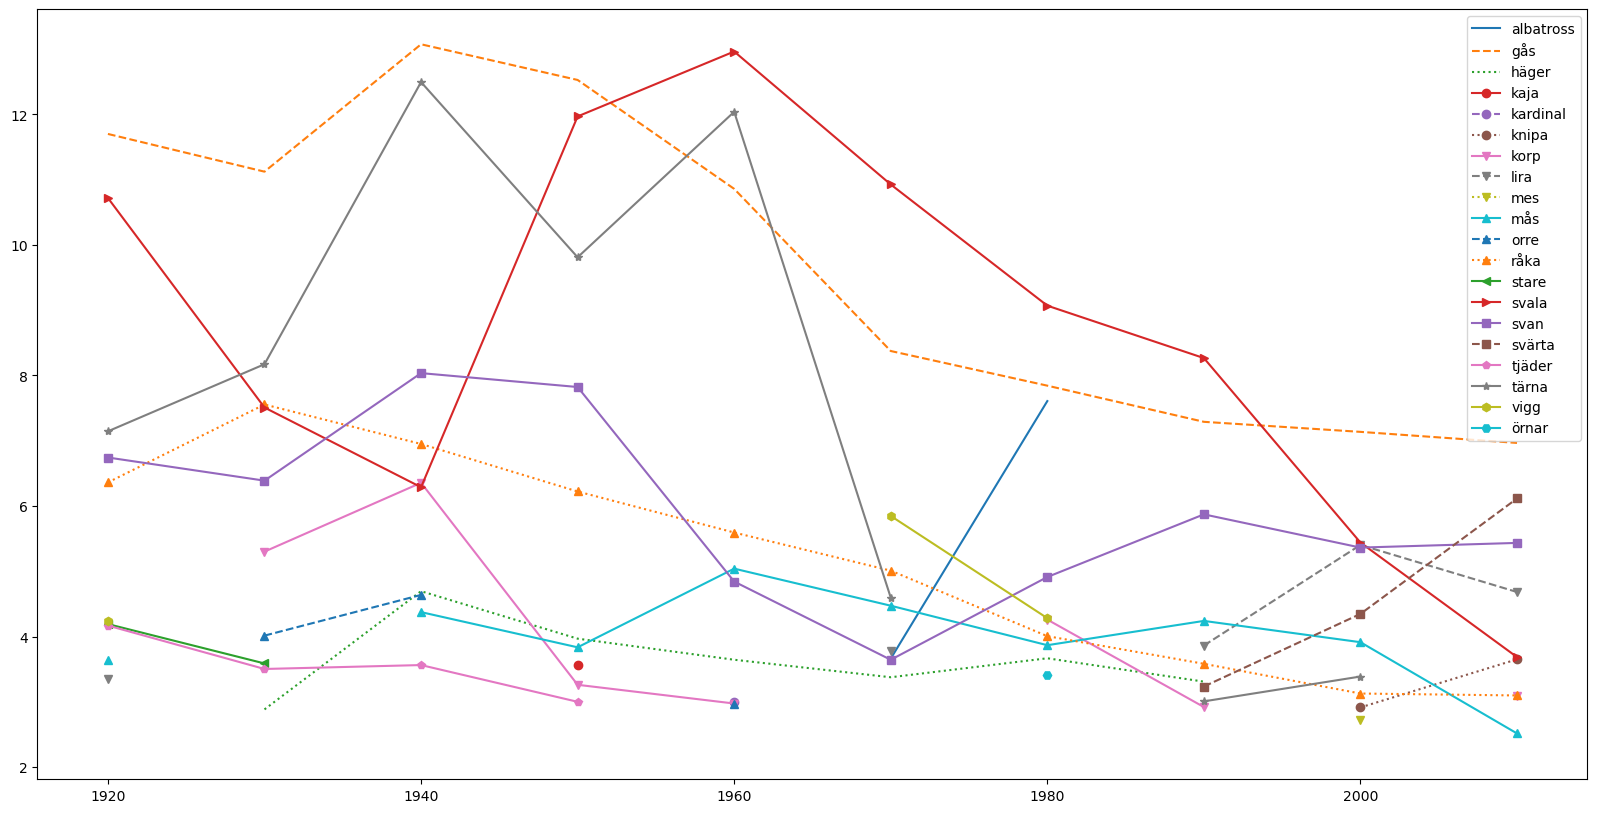

In [221]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
dfBestBirds.T.plot(style=['-','--', ":", "o-", "o--", "o:", "v-", "v--", "v:", "^-", "^--", "^:", "<-", ">-", "s-", "s--", "p-", "*-", "h-", "H-"],ax = ax)

In [226]:
df1920 = pd.read_feather(f"data/df_co_1920s_fågel.feather")
df1930 = pd.read_feather(f"data/df_co_1930s_fågel.feather")
df2010 = pd.read_feather(f"data/df_co_2010s_fågel.feather")

dfCount1920 = pd.read_feather(f"data/df_coWord_1920s_fågel.feather")
dfCount1930 = pd.read_feather(f"data/df_coWord_1930s_fågel.feather")
dfCount2010 = pd.read_feather(f"data/df_coWord_2010s_fågel.feather")

In [229]:
df1920

KeyboardInterrupt: 